# STOR 320 Homework 4 Visualization

Please submit the solution to gradescope by 11:59 PM, Oct 24, Thursday.

**Name**: Robert Nachnani

**PID**: 730573785


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import requests
from bs4 import BeautifulSoup

## Problem 1: Visualization of research areas for UNC School of Data Science and Society (25 points)

In this problem, you will use wordcloud to visualize the research areas of faculty members at UNC SDSS

1.1 Use web scraping techniques to collect the research interests of all faculty members in the UNC School of Data Science and Society from the webpage: [https://datascience.unc.edu/people/?wpv_view_count=743&wpv-people-category=faculty&wpv_post_search=](https://datascience.unc.edu/people/?wpv_view_count=743&wpv-people-category=faculty&wpv_post_search=)   (10 points)


- Create a `pd.DataFrame` that contains two columns: `faculty_name` and `research areas`. 
- For example, one row of the dataframe is `David Adalsteinsson` and `biology, interface problems, spatial modeling, algorithm development, creating tools for scientific computing and visualization`.
- For faculty members without listed research interests, use `np.nan` to represent missing values.

1.2 Notice that there are 4 pages of faculty members in total. Use web scraping to extract the research areas from all 4 pages and store them in the same format as described in 1.1. (2 points)

- Hint: You can use `'https://datascience.unc.edu/people/?wpv_view_count=743&wpv-people-category=faculty&wpv_post_search=&wpv_paged=' + str(i)` as the URL to access the content on page `i`.

1.3 How many rows do you obtain in the 1.2? How many rows have missing research areas? (2 points)

Hint: You can use `notnull()` or `isnull()` to check if cells within a DataFrame have missing data.

1.4 From the DataFrame in 1.2, select rows with research areas. Combine all the research areas into a single string called `text`. Remove the separator characters: `,`, `;` and ` and`. (6 points)


1.5 Create a wordcloud use function `WordCloud`. Set the title as **Research Areas for UNC SDSS**. Based on your observation, what are the main research topics for UNC SDSS? (5 points)

In [3]:
#Question 1.1 and 1.2
def scrape_page(page_num):
    url = f'https://datascience.unc.edu/people/?wpv_view_count=743&wpv-people-category=faculty&wpv_post_search=&wpv_paged={page_num}'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    faculty_data = []
    
    people = soup.find_all('div', class_='person-card')
    
    for person in people:
        name_tag = person.find('h2')
        name = name_tag.get_text(strip=True) if name_tag else np.nan
        
        research_tag = person.find('strong')
        if research_tag and 'Research Areas' in research_tag.get_text():
            research = research_tag.find_next('p').get_text(strip=True)
        else:
            research = np.nan
        
        faculty_data.append([name, research])
    
    return pd.DataFrame(faculty_data, columns = ['faculty_name', 'research_areas'])

UNC_SDSS = pd.concat([scrape_page(i) for i in range(1, 5)], ignore_index = True)

UNC_SDSS.head(5)

,faculty_name,research_areas
0,David Adalsteinsson,"biology, interface problems, spatial modeling,..."
1,Stan Ahalt,"Signal, image, and video processing, high-perf..."
2,Jay Aikat,Experimental methods and models in networking ...
3,Amarjit Budhiraja,"large deviations, stochastic control, stochast..."
4,Iain Carmichael,"Computational pathology, deep learning for med..."


In [4]:
#Question 1.3
total_rows = UNC_SDSS.shape[0]
null_data = UNC_SDSS['research_areas'].isnull().sum()

total_rows , null_data

(33, 6)

There are 33 total rows, and 6 of them have missing research information.

In [5]:
#Question 1.4
UNC_SDSS_w_research = UNC_SDSS[UNC_SDSS['research_areas'].notnull()]
text = ' '.join(UNC_SDSS_w_research['research_areas']).replace(',', '').replace(';', '').replace('.', '')
check = print(text)
check

biology interface problems spatial modeling algorithm development creating tools for scientific computing and visualization Signal image and video processing high-performance scientific and industrial computing pattern recognition applied to national security problems high-productivity domain-specific languages Experimental methods and models in networking research and education measurement and modeling of Internet traffic protocol benchmarking Internet traffic generation wireless networks congestion control and active queue management data science large deviations stochastic control stochastic differential games stochastic networks stochastic partial differential equations random graphs stochastic numerics nonlinear filtering Computational pathology deep learning for medical imaging multimodal data analysis natural language processing for clinical notes high resolution tissue imaging data (eg digital pathology spatial transcriptomics multiplex immunoflorecence) precision medicine/tran

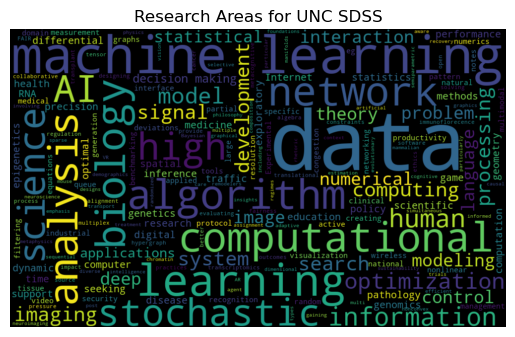

In [25]:
wordcloud = WordCloud(width = 1000, height=600).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Research Areas for UNC SDSS")
plt.show()

The main research topics within the SDSS deparment are, machine, learning, data, algorithims, computational, biology, stochastic, and analysis.  If I had to infer with these words I'd say the topics are Machine Learning(Optimization, AI, Imaging), Data(Biology,Stochastic, Analysis), and Computational(Analysis, Learning, Thinking).

## Problem 2. (20 points). 

Given a function $f(x) = \sin(5x)+\cos(3x)+x^{2}$, complete the following tasks:

- 2.1 visualize this function for $x\in [-2, 2]$ using `plt`. Add a title to the plot. (5 points)
- 2.2 Add a horizontal line at $y=0$ to the graph in 2.1 (2 points)

Hint: You can use `plt.hlines()` to draw a horizontal line.

- 2.3 How many intersections of the function and the horizontal line do you have? (3 points)

- 2.3 Based on the plot in 2.2, create another plot that zooms in on the area where x is between `[0.6, 0.7]`. Add a title to the plot. (5 points)

- 2.4 Create another plot to find the intersections of the function and the horizontal line. Mark them with red dots. You may find the intersections by observation. (5 points)

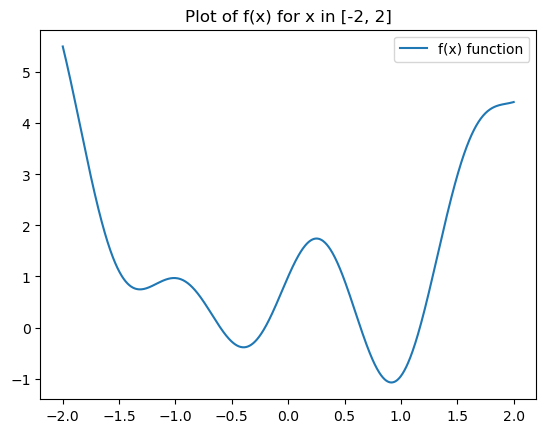

In [11]:
#Question 2.1

def f(x):
    return np.sin(5*x) + np.cos(3*x) + x**2

x = np.linspace(-2, 2, 1000)
y = f(x)

plt.plot(x, y, label = 'f(x) function')
plt.title("Plot of f(x) for x in [-2, 2]")
plt.legend()
plt.show()

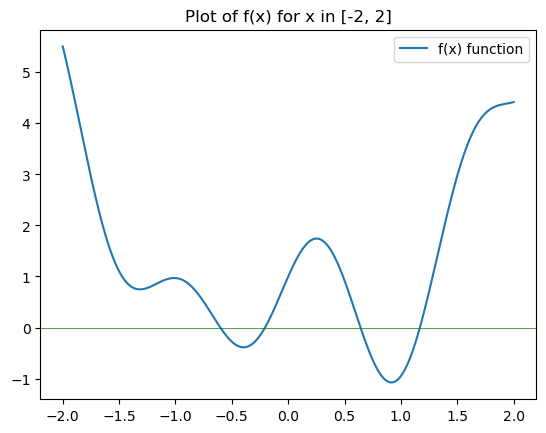

In [12]:
plt.plot(x, y, label = 'f(x) function')
plt.title("Plot of f(x) for x in [-2, 2]")
plt.axhline(0, color = 'green', linewidth=0.5)
plt.legend()
plt.show()

**Question 2.3:** 4 Intersections

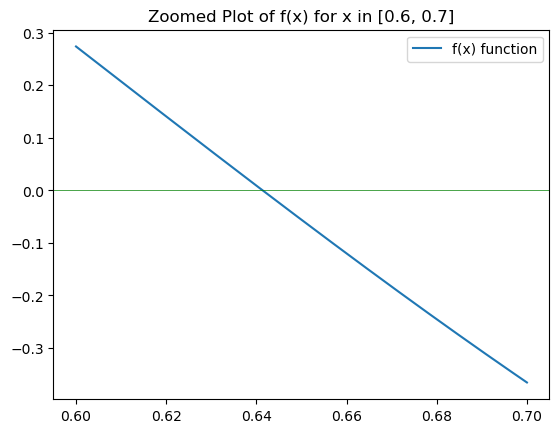

In [10]:
#Question 2.3
x = np.linspace(-2, 2, 1000)
y = f(x)

x_zoom = np.linspace(0.6, 0.7, 1000)
y_zoom = f(x_zoom)

plt.plot(x_zoom, y_zoom, label = 'f(x) function')
plt.title("Zoomed Plot of f(x) for x in [0.6, 0.7]")
plt.axhline(0, color = 'green', linewidth = 0.5)
plt.legend()
plt.show()

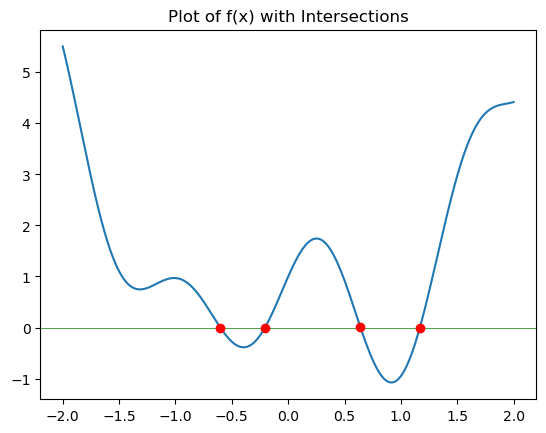

In [14]:
#Question 2.4
plt.plot(x, y, label = 'f(x) = sin(5x) + cos(3x) + x^2')
plt.title("Plot of f(x) with Intersections")
plt.axhline(0, color='green', linewidth = 0.5)
intersections = np.where(np.diff(np.sign(y)))[0]

plt.plot(x[intersections], y[intersections], 'ro')
plt.show()

## Problem 3. (20 points).

In this problem, you will draw a 3D ellipsoid in Matplotlib. To do so, you need to parameterize the ellipsoid equation in terms of two angles (azimuthal angle $\theta$ and polar angle $\phi$ and use the parametric equation of the ellipsoid.

The general equation for an ellipsoid is:
$$\frac{x^2}{a^2} + \frac{y^2}{b^2} + \frac{z^2}{c^2} = 1,$$

where: $a, b, c$ are the semi-axes of the ellipsoid along the x, y, and z directions, respectively.

To plot the ellipsoid, you can parametrize it in spherical coordinates as follows:

\begin{eqnarray}
x &=& a\sin(\phi)\cos(\theta)\\
y &=& b\sin(\phi)\sin(\theta)\\
z &=& c\cos(\phi),
\end{eqnarray}

where: $\theta$ varies from 0 to $2\pi$, $\phi$ varies from $0$ to $\pi$. 

Let $a=2, b=1, c=1.5$. Make a 3D plot that 
- show the ellipsoid (10 points)
- add appropriate title and labels for each axis (5 points)
- add two planar cross-sections of the ellipsoid: one parallel to the XY-plane (at $z=0$) and another parallel to the XZ-plane (at $y=0$). Use dashed lines to indicate these cross-sections. (5 points)

In [20]:
a = 2
b = 1
c = 1.5

theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 100)
theta, phi = np.meshgrid(theta, phi)

x = a * np.sin(phi) * np.cos(theta)
y = b * np.sin(phi) * np.sin(theta)
z = c * np.cos(phi)

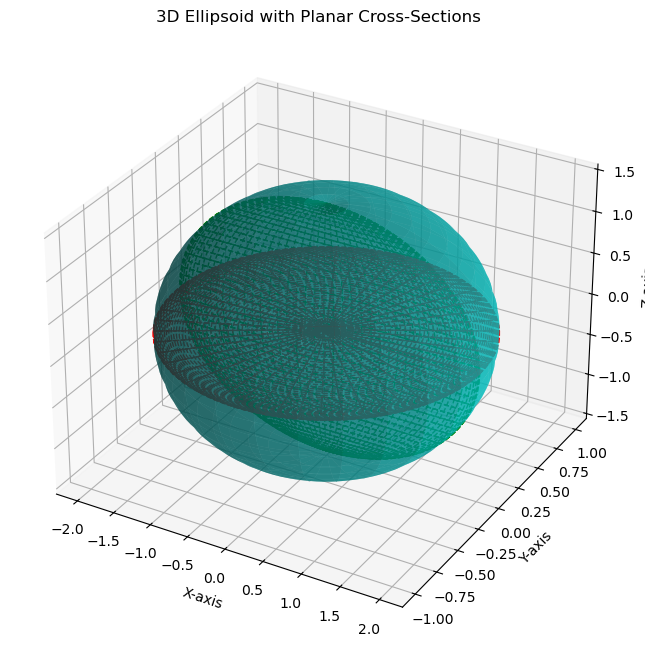

In [24]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(x, y, z, color = 'c', alpha = 0.6, rstride = 4, cstride = 4, edgecolor = 'none')
z_cross_section = np.zeros_like(x)
ax.plot_wireframe(x, y, z_cross_section, color = 'r', linestyle = '--', linewidth = 1)
y_cross_section = np.zeros_like(y)
ax.plot_wireframe(x, y_cross_section, z, color = 'g', linestyle = '--', linewidth = 1)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Ellipsoid with Planar Cross-Sections')
plt.show()

## Problem 4 (20 points): You are provided with a dataset containing random information about 50 different cars. The dataset includes the following columns:

- Horsepower: The horsepower of the car.
- Weight: The weight of the car in pounds.
- MPG: The miles per gallon (fuel efficiency) of the car.
- ModelYear: The model year of the car.
- Brand

In [17]:
cars = {
    'Horsepower': np.random.randint(60, 200, 50),
    'Weight': np.random.randint(1500, 4000, 50),
    'MPG': np.random.uniform(10, 40, 50),
    'ModelYear': np.random.randint(1970, 2020, 50),
    'Brand': np.random.choice(['Toyota','Honda','KIA'],50)
}
cars = pd.DataFrame(cars)
cars.head(3)

,Horsepower,Weight,MPG,ModelYear,Brand
0,109,2903,28.091938,2016,KIA
1,148,3624,13.541771,2018,KIA
2,157,1853,29.926644,2003,Toyota


Create a scatter plot to include the information of all five columns in `cars`.

- Use the shape of markers to represent car brands (3 points)
- Use Color to represent the weight of the car (3 points)
- Use x-axis to represent Horsepower (3 points)
- Use y-axis to represent MPG (3 points)
- Use the size of markers to represent the ModelYear (3 points)

Add titles, legend, labels to the graph. (5 points)

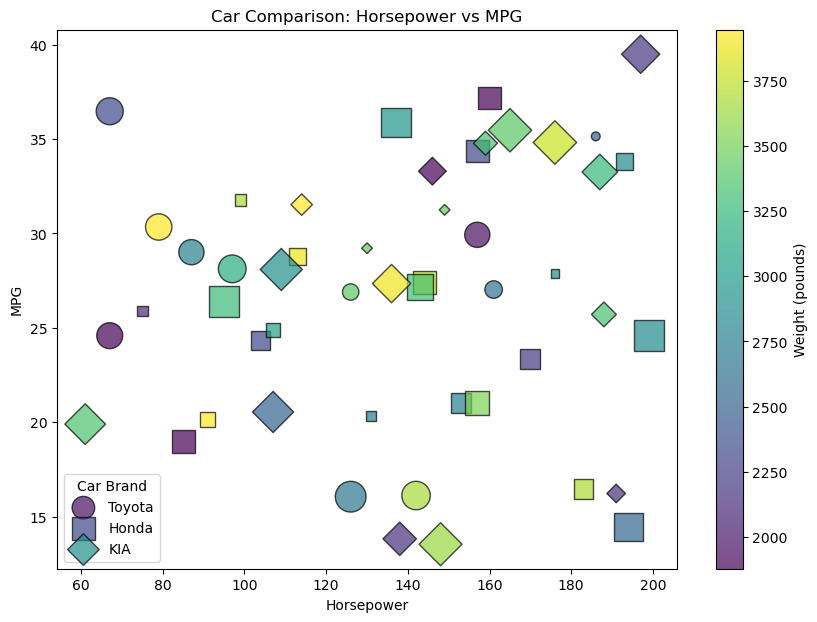

In [22]:
marker_dict = {'Toyota': 'o', 'Honda': 's', 'KIA': 'D'}
colors = cars['Weight']

plt.figure(figsize=(10, 7))

for brand in marker_dict:
    subset = cars[cars['Brand'] == brand]
    plt.scatter(subset['Horsepower'], subset['MPG'],
                s=(subset['ModelYear'] - 1970) * 10,
                c=subset['Weight'],
                marker=marker_dict[brand], 
                cmap='viridis', alpha=0.7, label=brand, edgecolor='black')

plt.colorbar(label='Weight (pounds)')

plt.title('Car Comparison: Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend(title='Car Brand')

plt.show()

## Problem 5: Recreate the same plot using `sns` (15 points)

Recall that in the lecture, we use the following code to create a bar plot for the iris dataset

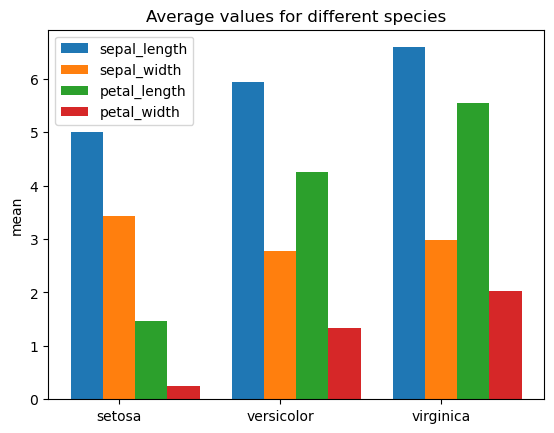

In [26]:
df = pd.read_csv('iris.csv')
avg_iris = df.groupby("species").mean()
width=0.2
multiplier=0
x = np.arange(3)
for i in range(avg_iris.shape[1]):
    offset = width * multiplier
    plt.bar(x + offset, avg_iris.iloc[:,i], width, label=avg_iris.columns[i])
    multiplier += 1
plt.legend()
plt.ylabel('mean')
plt.title('Average values for different species')
plt.xticks(x + width, avg_iris.index);

#### Create the same plot using `sns.barplot` function

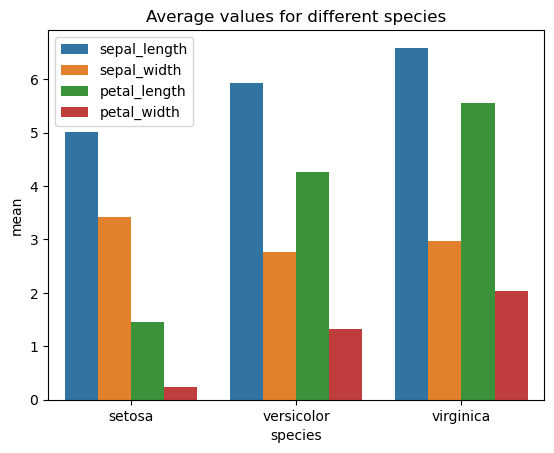

In [27]:
avg_iris = df.groupby("species").mean().reset_index() #Had to add .reset_index() for it to work
melted = pd.melt(avg_iris, id_vars = 'species', var_name = 'measurement', value_name = 'mean')

sns.barplot(data = melted, x = 'species', y = 'mean', hue = 'measurement')

plt.title('Average values for different species')
plt.ylabel('mean')
plt.legend()
plt.show()